In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/home/bartek/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [3]:
import types

class A:    
    def meth1(self, par1):
        print("in A.meth1: par1 =", par1)

a = A()
s = '''def meth1(self, par1):
    print("in recompiled A.meth1: par1 = ", par1)'''

In [4]:
def compileUnit(source):
        # compile code
        foo_code = compile(source, "<string>", "exec")
        foo_ns = {}
        exec(foo_code,foo_ns)
        return  types.MethodType(foo_ns["meth1"], A)

        

In [5]:
a.meth1=compileUnit(s)
a.meth1('avb')

in recompiled A.meth1: par1 =  avb


In [7]:
#code = compile(s, __file__, "exec")

#environment = {}
exec(code, environment)
a.meth1 = types.MethodType(environment["meth1"], A)

NameError: name 'code' is not defined

In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

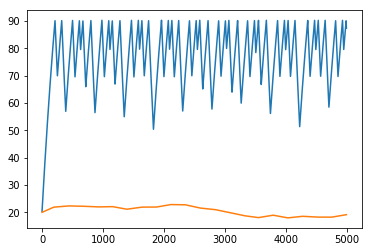

In [9]:
Pdataset = pandas.read_csv('piecFake.csv', usecols=[2,3], engine='python', skipfooter=3)
plt.plot(Pdataset)
plt.show()

In [11]:
Pdataset.tail(4)

,C1,C2
4993,88.9592,19.1423
4994,88.4196,19.1455
4995,87.8811,19.1487
4996,87.3436,19.1519


In [12]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(Pdataset)

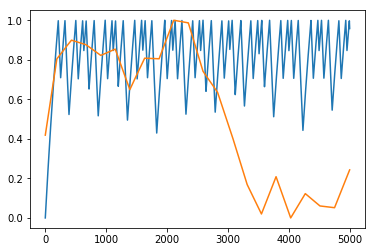

In [13]:
plt.plot(dataset)
plt.show()

In [14]:
dataset

array([[0.        , 0.4187061 ],
       [0.00571452, 0.42075406],
       [0.01141903, 0.42280202],
       ...,
       [0.9736963 , 0.24165967],
       [0.96598771, 0.24231502],
       [0.95829343, 0.24297037]])

In [15]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

3347 1650


In [16]:
# reshape into X=t and Y=t+1
look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [17]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [18]:
trainX.shape
dataset.shape

(4997, 2)

In [19]:
trainX.reshape(-1,4)

array([[0.        , 0.00571452, 0.01141903, 0.01711064],
       [0.02279224, 0.02846239, 0.03412252, 0.03976976],
       [0.04540841, 0.05103418, 0.05664993, 0.06225423],
       ...,
       [0.83966268, 0.84366084, 0.84765185, 0.85163426],
       [0.85560952, 0.85957619, 0.86353427, 0.86748519],
       [0.87142753, 0.87536127, 0.87928786, 0.88320729]])

In [20]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/100
 - 5s - loss: 0.0068
Epoch 2/100
 - 3s - loss: 2.5286e-04
Epoch 3/100
 - 3s - loss: 2.0546e-04
Epoch 4/100
 - 3s - loss: 1.6079e-04
Epoch 5/100
 - 3s - loss: 1.4271e-04
Epoch 6/100
 - 3s - loss: 1.2373e-04
Epoch 7/100
 - 3s - loss: 1.1275e-04
Epoch 8/100
 - 3s - loss: 9.6630e-05
Epoch 9/100
 - 3s - loss: 8.0333e-05
Epoch 10/100
 - 3s - loss: 7.4736e-05
Epoch 11/100
 - 3s - loss: 7.0087e-05
Epoch 12/100
 - 3s - loss: 6.4692e-05
Epoch 13/100
 - 3s - loss: 5.8226e-05
Epoch 14/100
 - 3s - loss: 5.5328e-05
Epoch 15/100
 - 3s - loss: 5.1281e-05
Epoch 16/100
 - 3s - loss: 5.0420e-05
Epoch 17/100
 - 3s - loss: 4.9077e-05
Epoch 18/100
 - 3s - loss: 4.8763e-05
Epoch 19/100
 - 3s - loss: 4.1202e-05
Epoch 20/100
 - 3s - loss: 4.1119e-05
Epoch 21/100
 - 3s - loss: 3.9348e-05
Epoch 22/100
 - 3s - loss: 3.7259e-05
Epoch 23/100
 - 3s - loss: 4.0697e-05
Epoch 24/100
 - 3s - loss: 3.8112e-05
Epoch 25/100
 - 3s - loss: 3.6878e-05
Epoch 26/100
 - 3s - loss: 3.5173e-05
Epoch 27/100
 - 3s - loss

In [21]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [22]:
trainPredict

array([[0.11161289],
       [0.11659296],
       [0.12161915],
       ...,
       [0.87988377],
       [0.8838012 ],
       [0.8877031 ]], dtype=float32)

In [23]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [24]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

ValueError: non-broadcastable output operand with shape (3326,1) doesn't match the broadcast shape (3326,2)

In [25]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.003 RMSE
Test Score: 0.003 RMSE


In [26]:
import datetime

with open('lstmpiec.log','a') as f:
    f.write("%s piecFake   : train %.5f  test %.3f  RSME  dataset %s \n" %
         ( datetime.datetime.now(),trainScore,  testScore,dataset.shape))


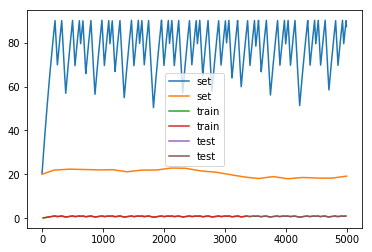

In [27]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)-7:len(dataset)-9, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label="set")
plt.plot(trainPredictPlot,label="train")
plt.plot(testPredictPlot,label="test")
plt.legend()
plt.show()